<a href="https://colab.research.google.com/github/jnctproject/pytorch-tutorial/blob/main/introduction_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import torch

In [171]:
num=[[1,2,3,4],[5,6,7,8]]
num

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [172]:
import numpy as np
np1=np.random.rand(2,3,4)
print(np1)
np1.dtype


[[[0.39547653 0.16230004 0.61018186 0.05752749]
  [0.24208482 0.8555447  0.12518263 0.49689282]
  [0.88124917 0.27979467 0.98083635 0.48624844]]

 [[0.62706953 0.01253671 0.79760921 0.79543375]
  [0.55660965 0.51847054 0.31566188 0.29501627]
  [0.18231798 0.58040087 0.64218364 0.95010458]]]


dtype('float64')

In [173]:
tensor_2d=torch.rand(2,3,4)
tensor_2d

tensor([[[0.3519, 0.5081, 0.8162, 0.8118],
         [0.5446, 0.4520, 0.2566, 0.7457],
         [0.7919, 0.1395, 0.1003, 0.1427]],

        [[0.7036, 0.3414, 0.1708, 0.3938],
         [0.3818, 0.8840, 0.7969, 0.9161],
         [0.4084, 0.6379, 0.4457, 0.8163]]])

In [174]:
tensor1=torch.tensor(np1)
tensor1

tensor([[[0.3955, 0.1623, 0.6102, 0.0575],
         [0.2421, 0.8555, 0.1252, 0.4969],
         [0.8812, 0.2798, 0.9808, 0.4862]],

        [[0.6271, 0.0125, 0.7976, 0.7954],
         [0.5566, 0.5185, 0.3157, 0.2950],
         [0.1823, 0.5804, 0.6422, 0.9501]]], dtype=torch.float64)

In [175]:
import torch

In [176]:
tn1=torch.tensor([1,2,3,4,5])
tn2=torch.tensor([6,7,8,9,10])
print(tn1+tn2)

tensor([ 7,  9, 11, 13, 15])


In [177]:
torch.add(tn1,tn2)

tensor([ 7,  9, 11, 13, 15])

In [178]:
torch.add(tn1,tn2)
torch.sub(tn1,tn2)
torch.mul(tn1,tn2)
torch.div(tn1,tn2)
torch.pow(tn1,tn2)
torch.remainder(tn2,tn1)
print(tn1)
tn1.add(tn2)
print(tn1)
tn2
tn1.add(tn2)
tn2
tn1

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5])


tensor([1, 2, 3, 4, 5])

In [179]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [180]:
# create a class the inherites nn.module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2, out_features)


  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [181]:
torch.manual_seed(31)
model=Model()

In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [183]:
url='iris.data'
column=['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
data = pd.read_csv(url,names=column)
data['variety']=data['variety'].replace('Iris-setosa',0.0)
data['variety']=data['variety'].replace('Iris-versicolor',1.0)
data['variety']=data['variety'].replace('Iris-virginica',2.0)


<ipython-input-183-0fe729fc4895>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['variety']=data['variety'].replace('Iris-virginica',2.0)


In [184]:
X=data.drop('variety',axis=1)
y=data['variety']
X=X.values
y=y.values

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [187]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [188]:
criterion =nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)



In [189]:
epochs=200
losses=[]
for i in range(epochs):
  y_pred=model.forward(X_train)

  loss=criterion(y_pred,y_train)

  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch:{i}and loss:{loss}')

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()




Epoch:0and loss:1.0948584079742432
Epoch:10and loss:0.9568084478378296
Epoch:20and loss:0.7678928971290588
Epoch:30and loss:0.5515527725219727
Epoch:40and loss:0.40809521079063416
Epoch:50and loss:0.32005006074905396
Epoch:60and loss:0.2393576204776764
Epoch:70and loss:0.16571614146232605
Epoch:80and loss:0.11364854872226715
Epoch:90and loss:0.08313100785017014
Epoch:100and loss:0.0655067041516304
Epoch:110and loss:0.05475948005914688
Epoch:120and loss:0.04770264774560928
Epoch:130and loss:0.0427081361413002
Epoch:140and loss:0.038942500948905945
Epoch:150and loss:0.03596850484609604
Epoch:160and loss:0.03354065492749214
Epoch:170and loss:0.03151104599237442
Epoch:180and loss:0.029783686622977257
Epoch:190and loss:0.02829156443476677


Text(0.5, 0, 'Epochs')

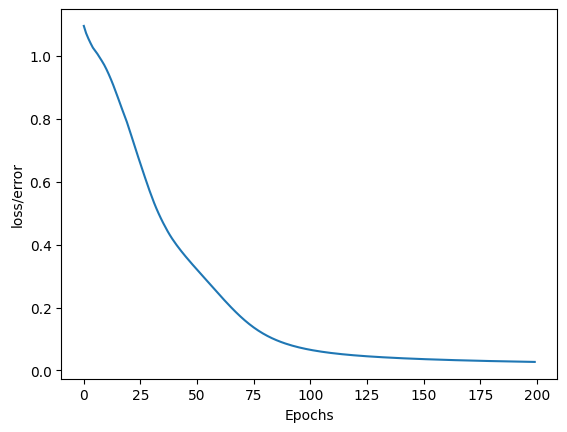

In [190]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epochs')

In [191]:
#evaluation of model
with torch.no_grad():
  y_eval=model.forward(X_test)
  loss=criterion(y_eval,y_test)
  print(loss)


tensor(0.1363)


In [198]:
correct=0
with torch.no_grad():
  for i, data1 in enumerate(X_test):
    y_val=model.forward(data1)
    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='Virginica'
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')
  if y_val.argmax().item()==y_test[i]:
    correct+=i
  print(f'we got{correct} correct!')

1.) tensor([-5.4013,  4.3628,  7.3335]) 	 Virginica 	 2
2.) tensor([-8.6373,  3.1316, 12.5649]) 	 Virginica 	 2
3.) tensor([-8.8933,  3.9954, 12.6991]) 	 Virginica 	 2
4.) tensor([-1.9279,  6.9743,  1.3429]) 	 Versicolor 	 1
5.) tensor([-7.2800,  4.3156, 10.1764]) 	 Virginica 	 2
6.) tensor([ 0.3150,  8.1136, -2.3662]) 	 Versicolor 	 1
7.) tensor([-5.0831,  5.0485,  6.6548]) 	 Virginica 	 2
8.) tensor([-1.9641,  7.1304,  1.3521]) 	 Versicolor 	 1
9.) tensor([-6.2308,  4.7166,  8.4797]) 	 Virginica 	 2
10.) tensor([-9.2837,  3.2919, 13.4918]) 	 Virginica 	 2
11.) tensor([-4.8730,  5.2407,  6.2825]) 	 Virginica 	 2
12.) tensor([ 14.1221,   7.3553, -21.7638]) 	 Setosa 	 0
13.) tensor([ 12.7362,   6.6815, -19.5971]) 	 Setosa 	 0
14.) tensor([ 2.0607,  7.0476, -4.5428]) 	 Versicolor 	 1
15.) tensor([ 13.1360,   7.3912, -20.3983]) 	 Setosa 	 0
16.) tensor([-4.2039,  5.6714,  5.1495]) 	 Virginica 	 1
17.) tensor([ 13.3649,   7.0076, -20.5881]) 	 Setosa 	 0
18.) tensor([-5.3371,  4.7349,  7.12

In [199]:
new_iris=torch.tensor([5.6,2.3,4.5,6.8])
with torch.no_grad():
  print(model(new_iris))

tensor([-19.9882,   1.4542,  30.1645])


In [ ]:
#save our neural network
